## **Hyperparameters & Tuning**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## We want to send $80 discount applied to next bill
## 20% of the customers (lift at the top 20%)

In [14]:
## missing values?
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
## number of levels before encoding
for i in df.select_dtypes('object'):
  print(f'Variable {i} has {df[i].nunique()} levels')

Variable gender has 2 levels
Variable Partner has 2 levels
Variable Dependents has 2 levels
Variable PhoneService has 2 levels
Variable MultipleLines has 3 levels
Variable InternetService has 3 levels
Variable OnlineSecurity has 3 levels
Variable OnlineBackup has 3 levels
Variable DeviceProtection has 3 levels
Variable TechSupport has 3 levels
Variable StreamingTV has 3 levels
Variable StreamingMovies has 3 levels
Variable Contract has 3 levels
Variable PaperlessBilling has 2 levels
Variable PaymentMethod has 4 levels
Variable Churn has 2 levels


In [7]:
## drop CustomerID
df.drop('customerID', axis=1, inplace=True)

In [10]:
## any strings coerce the errors to missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = "coerce")

In [13]:
## Impute the TotalCharges with the median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [15]:
## map the Churn variable to 0s and 1s
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
## dummy encode
df = pd.get_dummies(df, drop_first = True)

In [19]:
## Create X and y
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [20]:
## split 80% 20% random_state = 13
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)

## **Modeling**

In [22]:
## 1) dt1, max_depth = 3, GINI

In [23]:
from sklearn.tree import DecisionTreeClassifier

## instance
dt1 = DecisionTreeClassifier(max_depth = 3, criterion = "gini")

## fit
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

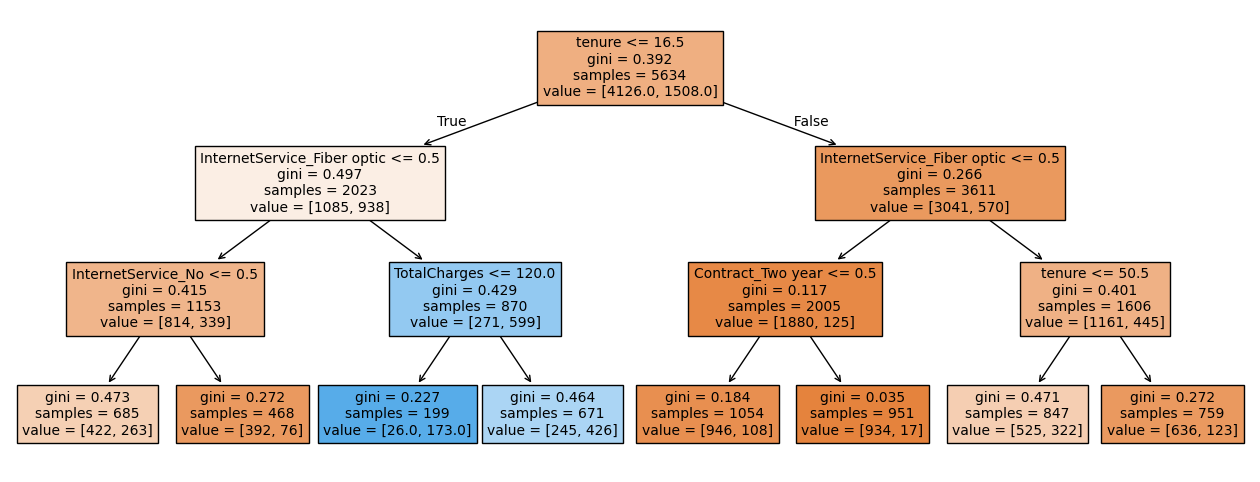

In [25]:
## plot the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize = (16,6))
plot_tree(dt1, filled = True, feature_names = X_train.columns, fontsize = 10);

In [26]:
## Predict Prob(Churn) - 10 months, Has Fiber Optic Internet, $ 85 Total Charges
173 / 199

0.8693467336683417

In [27]:
## What are the conditions for the customers MOST LIKELY to churn
## tenure < 16.5, has fiber optic internet, and total charges <= 120
## What are the conditions for the customers LEAST LIKELY to churn
## tenure > 16.5, no fiber optic internet, and locked in a two-year contract

In [28]:
## when the impurity in the terminal nodes is high
## then we can relax the stopping rules so that we can get a deeper tree

In [29]:
## 2) dt2, max_depth = 3, ENTROPY

## instance
dt2 = DecisionTreeClassifier(max_depth = 3, criterion = "entropy")

## fit
dt2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

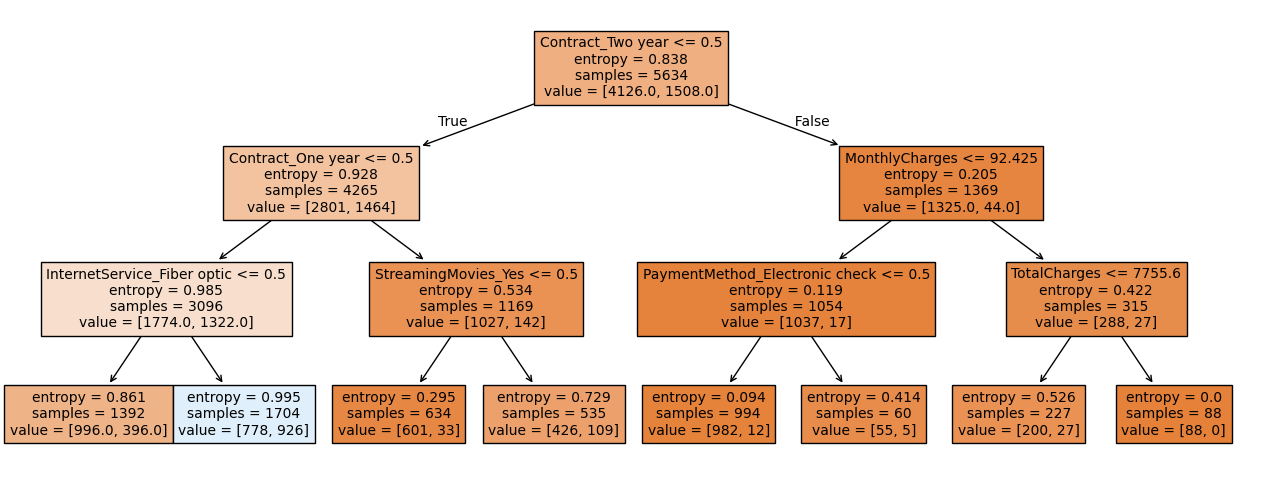

In [33]:
plt.figure(figsize = (16,6))
plot_tree(dt2, filled = True, feature_names = X_train.columns, fontsize = 10 );

In [32]:
## calculate the entropy at a given node
p1 = 778 / 1704
p2 = 926 / 1704

entropy = -(p1*np.log2(p1) + (p2*np.log2(p2)))
entropy

0.994551510309033

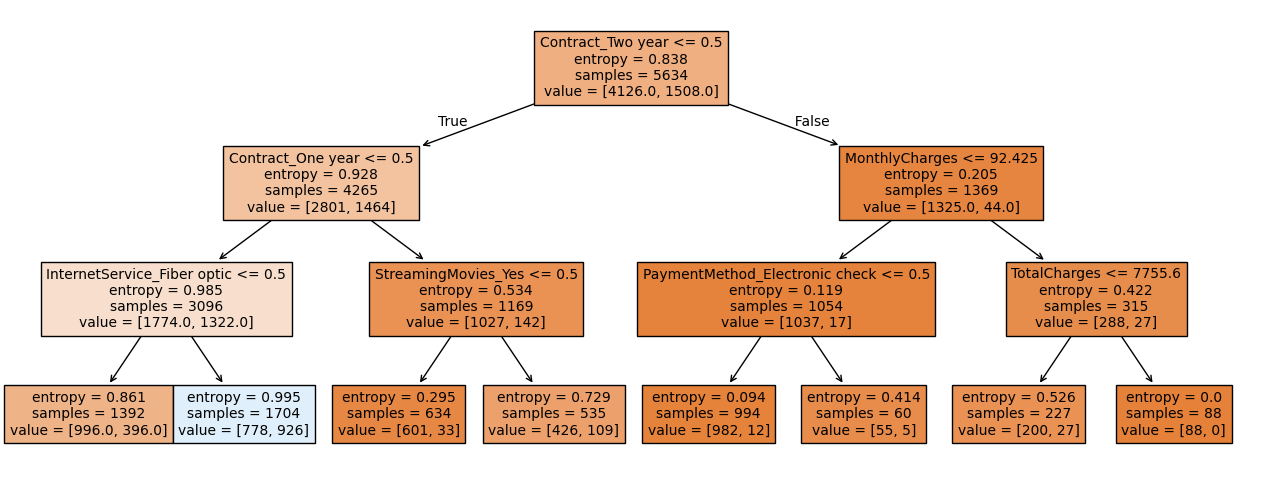

In [35]:
plt.figure(figsize = (16,6))
plot_tree(dt2, filled = True, feature_names = X_train.columns, fontsize = 10 );

In [37]:
## calculate the entropy improvement from parent node to children node
## parent node - 0.985  - n = 3096
## left child - 0.861   - n = 1392
## right child - 0.995  - n = 1704
combined_entropy = (1392/3096)*0.861 + (1704/3096)*0.995
combined_entropy

0.9347519379844962

In [38]:
## improvement
0.985 - combined_entropy

0.0502480620155038

## **Performance**

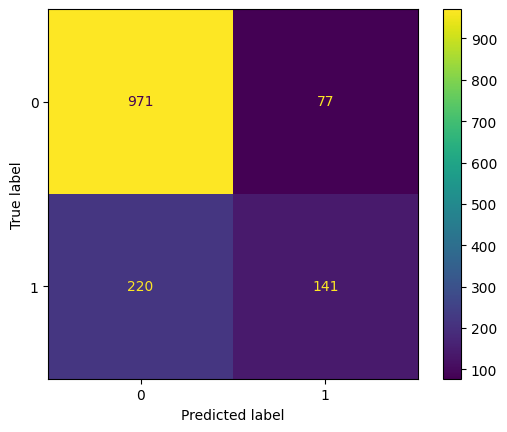

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

## tree 1 performance
ConfusionMatrixDisplay(confusion_matrix(y_test, dt1.predict(X_test))).plot()

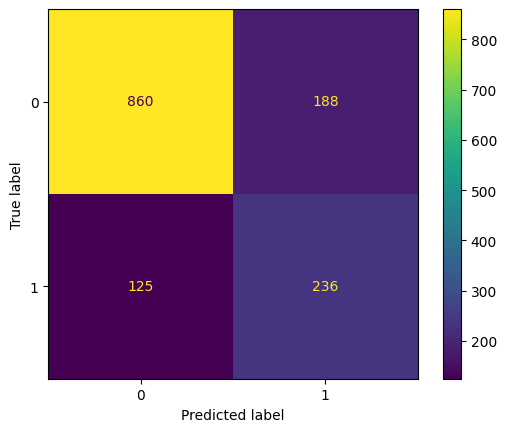

In [40]:
## tree 1 performance
ConfusionMatrixDisplay(confusion_matrix(y_test, dt2.predict(X_test))).plot()

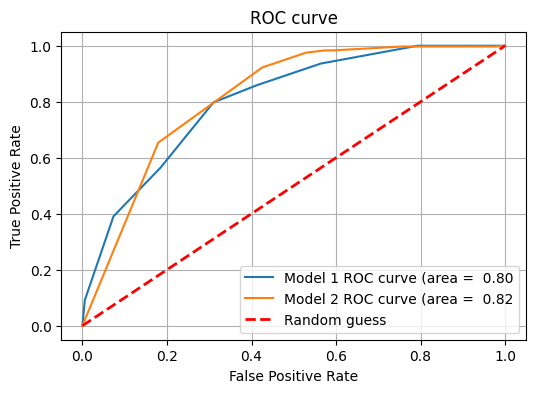

In [44]:
## Which model is BETTER?
## THINK ABOUT THE CUTOFF (OPTIMAL? IMBALANCED? )
## AUC (regardless of the cutoff, the AUC shows what model outperforms)
## import modules
from sklearn.metrics import auc, roc_curve

## CHANGE : get phat1 (d1) and phat2 (dt2)
phat1 = dt1.predict_proba(X_test)[:,1]
phat2 = dt2.predict_proba(X_test)[:,1]

## Get TPR, FPR and Thresholds for EACH model
fpr1, tpr1, thresh1 = roc_curve(y_test, phat1)
fpr2, tpr2, thresh2 = roc_curve(y_test, phat2)


## Get AUCs for EACH model
AUC_val1 = auc(fpr1, tpr1)
AUC_val2 = auc(fpr2, tpr2)


## Plot ROC Curves with AUCs for EACH model
import matplotlib.pyplot as plt
plt.figure(figsize = (6,4))
plt.plot(fpr1, tpr1, label= f'Model 1 ROC curve (area = {AUC_val1: 0.2f}')
plt.plot(fpr2, tpr2, label= f'Model 2 ROC curve (area = {AUC_val2: 0.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guess')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [45]:
## Model 2 has an AUC of 0.82 outperforming Model 1.

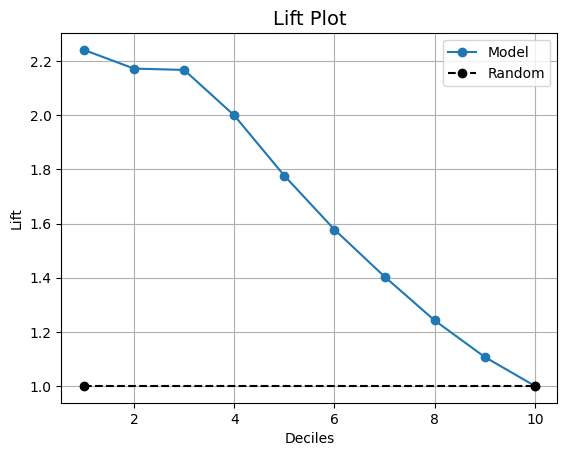

In [47]:
## Lift at top 20% (how much better than random)
## We are sending $80 to the customers with top 20% highest propensities to CHURN
## !pip install kds
import kds

kds.metrics.plot_lift(y_test, phat2);

LABELS INFO:

 prob_min         : Minimum probability in a particular decile
 prob_max         : Minimum probability in a particular decile
 prob_avg         : Average probability in a particular decile
 cnt_events       : Count of events in a particular decile
 cnt_resp         : Count of responders in a particular decile
 cnt_non_resp     : Count of non-responders in a particular decile
 cnt_resp_rndm    : Count of responders if events assigned randomly in a particular decile
 cnt_resp_wiz     : Count of best possible responders in a particular decile
 resp_rate        : Response Rate in a particular decile [(cnt_resp/cnt_cust)*100]
 cum_events       : Cumulative sum of events decile-wise 
 cum_resp         : Cumulative sum of responders decile-wise 
 cum_resp_wiz     : Cumulative sum of best possible responders decile-wise 
 cum_non_resp     : Cumulative sum of non-responders decile-wise 
 cum_events_pct   : Cumulative sum of percentages of events decile-wise 
 cum_resp_pct     : Cu

,decile,prob_min,prob_max,prob_avg,cnt_cust,cnt_resp,cnt_non_resp,cnt_resp_rndm,cnt_resp_wiz,resp_rate,cum_cust,cum_resp,cum_resp_wiz,cum_non_resp,cum_cust_pct,cum_resp_pct,cum_resp_pct_wiz,cum_non_resp_pct,KS,lift
0,1,0.543,0.543,0.543,141.0,81.0,60.0,36.1,141,57.447,141.0,81.0,141,60.0,10.007,22.438,39.058,5.725,16.713,2.242
1,2,0.543,0.543,0.543,141.0,76.0,65.0,36.1,141,53.901,282.0,157.0,282,125.0,20.014,43.490,78.116,11.927,31.563,2.173
2,3,0.543,0.543,0.543,141.0,78.0,63.0,36.1,79,55.319,423.0,235.0,361,188.0,30.021,65.097,100.000,17.939,47.158,2.168
3,4,0.284,0.543,0.286,141.0,54.0,87.0,36.1,0,38.298,564.0,289.0,361,275.0,40.028,80.055,100.000,26.240,53.815,2.000
4,5,0.284,0.284,0.284,141.0,32.0,109.0,36.1,0,22.695,705.0,321.0,361,384.0,50.035,88.920,100.000,36.641,52.279,1.777
5,6,0.204,0.284,0.246,141.0,21.0,120.0,36.1,0,14.894,846.0,342.0,361,504.0,60.043,94.737,100.000,48.092,46.645,1.578
6,7,0.052,0.204,0.145,141.0,13.0,128.0,36.1,0,9.220,987.0,355.0,361,632.0,70.050,98.338,100.000,60.305,38.033,1.404
7,8,0.052,0.052,0.052,141.0,4.0,137.0,36.1,0,2.837,1128.0,359.0,361,769.0,80.057,99.446,100.000,73.378,26.068,1.242
8,9,0.012,0.052,0.019,141.0,1.0,140.0,36.1,0,0.709,1269.0,360.0,361,909.0,90.064,99.723,100.000,86.737,12.986,1.107
9,10,0.000,0.012,0.010,140.0,1.0,139.0,36.1,0,0.714,1409.0,361.0,361,1048.0,100.000,100.000,100.000,100.000,0.000,1.000


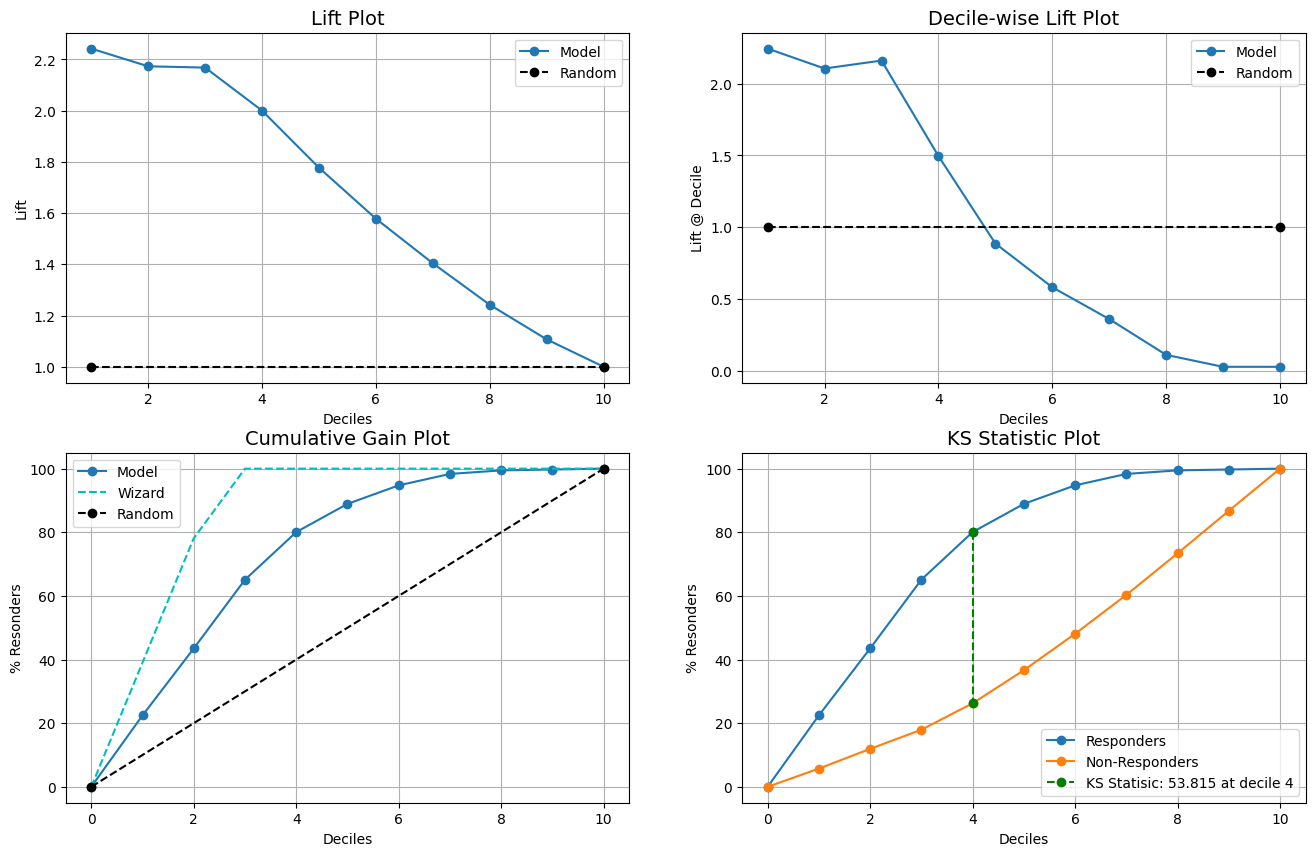

In [48]:
kds.metrics.report(y_test, dt2.predict_proba(X_test)[:,1])

In [ ]:
## If you use the model, the model detect customers likely to churn 2.173 times better
## than random.

In [50]:
## Grid Search with Cross Validation

## 1) create a grid (the options)
param_grid = {
            'criterion': ["gini", "entropy"],
            'max_depth': [2, 4, 6, None],
            'min_samples_split': [2, 20, 40]
}

## decide CV (5 or 10)
## ALL CORES (n_jobs = -1)

## 2) sklearn grid
from sklearn.model_selection import GridSearchCV

#### instance of the MODEL
dt = DecisionTreeClassifier() ## unrestricted - no stopping

#### instance of the Grid Search
dt_grid = GridSearchCV(dt, param_grid, cv = 5, n_jobs = -1)

#### fit
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, None],
                         'min_samples_split': [2, 20, 40]})

In [51]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 40}